### This notebook aims to explore about the audio features

Some of the audio features that we will explore:
- Root-Mean-Square Energy (RMS Energy)
- Zero-Crossing Rate (ZCR)
- Spectral Centroid
- Spectral Bandwidth
- Spectral Flatness
- Spectral Contrast
- Spectral Rolloff
- Chromagram STFT
- Constant-Q Chromagram
- Chromagram Variant "Chroma Energy Normalised" (CENS)
- Variable-Q Chromagram
- Melspectrogram
- MFCCs
- Poly Features
- Tonal Centroid Features

### TLDR

Some of the features that can be used since they clearly show a disparity between "yes" class and "no" class are:
- Mean of Root-Mean-Square Energy (RMS Energy)
- Standard Deviation of RMS Energy
- Mean of Zero-Crossing Rate
- Mean of Spectral Centroid
- Standard Deviation of Spectral Bandwidth
- Mean of Spectral Flatness
- Mean of Spectral Rolloff

<br>

Question: what about other audio features?
- Currently, they are not well studied by me yet

### Import Libraries

In [1]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
# import pandas as pd

### Load Sample Audios

In [2]:
yes_audios = os.listdir("../data/yes/")
no_audios = os.listdir("../data/no/")

# we will grab the first two audios in each class
sample_yes_audio1_path = "../data/yes/" + yes_audios[0]
sample_yes_audio2_path = "../data/yes/" + yes_audios[1]
sample_yes_audio3_path = "../data/yes/" + yes_audios[2]
sample_no_audio1_path = "../data/no/" + no_audios[0]
sample_no_audio2_path = "../data/no/" + no_audios[1]
sample_no_audio3_path = "../data/no/" + no_audios[2]

# load the audios
sample_yes_audio1, sr = librosa.load(sample_yes_audio1_path)
sample_yes_audio2, _ = librosa.load(sample_yes_audio2_path)
sample_yes_audio3, _ = librosa.load(sample_yes_audio3_path)
sample_no_audio1, _ = librosa.load(sample_no_audio1_path)
sample_no_audio2, _ = librosa.load(sample_no_audio2_path)
sample_no_audio3, _ = librosa.load(sample_no_audio3_path)

In [3]:
ipd.Audio(sample_yes_audio1_path)

In [4]:
ipd.Audio(sample_yes_audio2_path)

In [5]:
ipd.Audio(sample_yes_audio3_path)

In [6]:
ipd.Audio(sample_no_audio1_path)

In [7]:
ipd.Audio(sample_no_audio2_path)

In [8]:
ipd.Audio(sample_no_audio3_path)

### Define Some Constants

In [9]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

### Root-Mean-Square Energy (RMS Energy)

Mean:
'yes audio 1':  0.09630211442708969
'yes audio 2':  0.07471417635679245
'yes audio 3':  0.02059653028845787
'no audio 1':   0.05429947003722191
'no audio 2':   0.005322509910911322
'no audio 2':   0.06949415057897568

Standard Deviation:
'yes audio 1':  0.005716756451874971
'yes audio 2':  0.014705548994243145
'yes audio 3':  0.0015247402479872108
'no audio 1':   0.016023147851228714
'no audio 2':   0.0021183681674301624
'no audio 3':   0.03216269239783287

Variance:
'yes audio 1':  3.268130240030587e-05
'yes audio 2':  0.00021625317458529025
'yes audio 3':  2.32483284889895e-06
'no audio 1':   0.0002567412448115647
'no audio 2':   4.487484147830401e-06
'no audio 3':   0.0010344387264922261



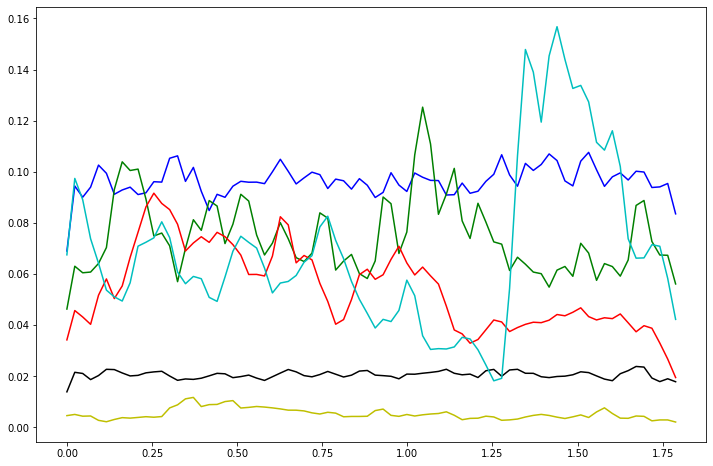

In [25]:
# RMS Energy as the y-axis
rms_yes_1 = librosa.feature.rms(y=sample_yes_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_yes_2 = librosa.feature.rms(y=sample_yes_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_yes_3 = librosa.feature.rms(y=sample_yes_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_1 = librosa.feature.rms(y=sample_no_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_2 = librosa.feature.rms(y=sample_no_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_3 = librosa.feature.rms(y=sample_no_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(rms_yes_1)}
'yes audio 2':  {np.mean(rms_yes_2)}
'yes audio 3':  {np.mean(rms_yes_3)}
'no audio 1':   {np.mean(rms_no_1)}
'no audio 2':   {np.mean(rms_no_2)}
'no audio 2':   {np.mean(rms_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(rms_yes_1)}
'yes audio 2':  {np.std(rms_yes_2)}
'yes audio 3':  {np.std(rms_yes_3)}
'no audio 1':   {np.std(rms_no_1)}
'no audio 2':   {np.std(rms_no_2)}
'no audio 3':   {np.std(rms_no_3)}

Variance:
'yes audio 1':  {np.var(rms_yes_1)}
'yes audio 2':  {np.var(rms_yes_2)}
'yes audio 3':  {np.var(rms_yes_3)}
'no audio 1':   {np.var(rms_no_1)}
'no audio 2':   {np.var(rms_no_2)}
'no audio 3':   {np.var(rms_no_3)}
""")

# Time as the x-axis
frames = range(0, rms_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, rms_yes_1, color='b')
plt.plot(t, rms_yes_2, color='g')
plt.plot(t, rms_yes_3, color='k')
plt.plot(t, rms_no_1, color='r')
plt.plot(t, rms_no_2, color='y')
plt.plot(t, rms_no_3, color='c')
plt.show()

### Zero-Crossing Rate (ZCR)

Mean:
'yes audio 1':  0.21096254006410256
'yes audio 2':  0.13676883012820512
'yes audio 3':  0.16132061298076922
'no audio 1':   0.05009264823717949
'no audio 2':   0.033353365384615384
'no audio 3':   0.04984224759615385

Standard Deviation:
'yes audio 1':  0.01701400034694624
'yes audio 2':  0.03224321266253678
'yes audio 3':  0.012388285439859257
'no audio 1':   0.023908583774698778
'no audio 2':   0.0121702439707921
'no audio 3':   0.019154163761390924

Variance:
'yes audio 1':  0.0002894762078058868
'yes audio 2':  0.0010396247628015724
'yes audio 3':  0.00015346961613942888
'no audio 1':   0.0005716203781117896
'no audio 2':   0.00014811483830860146
'no audio 3':   0.0003668819893981813



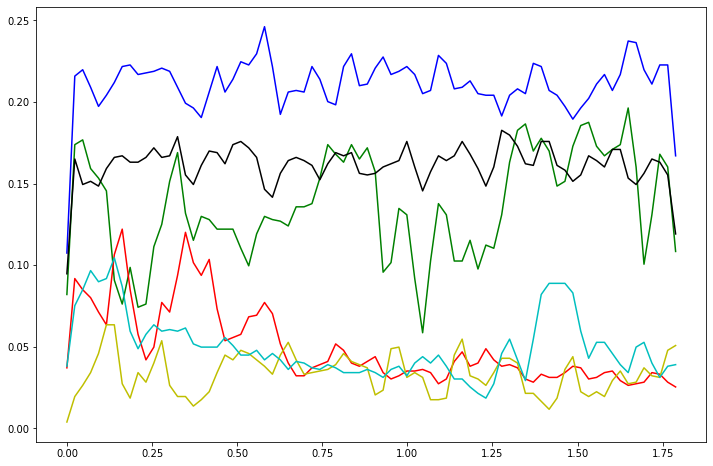

In [11]:
# Zero-Crossing Rate as the y-axis
zcr_yes_1 = librosa.feature.zero_crossing_rate(y=sample_yes_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_yes_2 = librosa.feature.zero_crossing_rate(y=sample_yes_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_yes_3 = librosa.feature.zero_crossing_rate(y=sample_yes_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_1 = librosa.feature.zero_crossing_rate(y=sample_no_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_2 = librosa.feature.zero_crossing_rate(y=sample_no_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_3 = librosa.feature.zero_crossing_rate(y=sample_no_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(zcr_yes_1)}
'yes audio 2':  {np.mean(zcr_yes_2)}
'yes audio 3':  {np.mean(zcr_yes_3)}
'no audio 1':   {np.mean(zcr_no_1)}
'no audio 2':   {np.mean(zcr_no_2)}
'no audio 3':   {np.mean(zcr_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(zcr_yes_1)}
'yes audio 2':  {np.std(zcr_yes_2)}
'yes audio 3':  {np.std(zcr_yes_3)}
'no audio 1':   {np.std(zcr_no_1)}
'no audio 2':   {np.std(zcr_no_2)}
'no audio 3':   {np.std(zcr_no_3)}

Variance:
'yes audio 1':  {np.var(zcr_yes_1)}
'yes audio 2':  {np.var(zcr_yes_2)}
'yes audio 3':  {np.var(zcr_yes_3)}
'no audio 1':   {np.var(zcr_no_1)}
'no audio 2':   {np.var(zcr_no_2)}
'no audio 3':   {np.var(zcr_no_3)}
""")

# Time as the x-axis
frames = range(0, zcr_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, zcr_yes_1, color='b')
plt.plot(t, zcr_yes_2, color='g')
plt.plot(t, zcr_yes_3, color='k')
plt.plot(t, zcr_no_1, color='r')
plt.plot(t, zcr_no_2, color='y')
plt.plot(t, zcr_no_3, color='c')
plt.show()

### Spectral Centroid

Mean:
'yes audio 1':  3139.498926240773
'yes audio 2':  2598.797012657069
'yes audio 3':  2533.1766358304976
'no audio 1':   1031.1173820242236
'no audio 2':   1400.9851116395153
'no audio 3':   1014.9073284122685

Standard Deviation:
'yes audio 1':  101.73808493782583
'yes audio 2':  228.7432561399566
'yes audio 3':  95.15947998761658
'no audio 1':   294.5271585051592
'no audio 2':   224.86391188294698
'no audio 3':   219.92281193300082

Variance:
'yes audio 1':  10350.637926816264
'yes audio 2':  52323.47722950979
'yes audio 3':  9055.326631513599
'no audio 1':   86746.24709712317
'no audio 2':   50563.77886730174
'no audio 3':   48366.043208518044



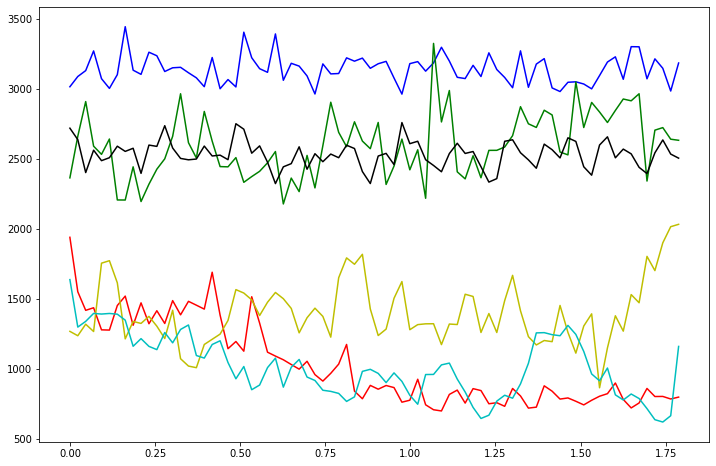

In [12]:
# Spectral Centroid as the y-axis
spectral_centroid_yes_1 = librosa.feature.spectral_centroid(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_yes_2 = librosa.feature.spectral_centroid(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_yes_3 = librosa.feature.spectral_centroid(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_1 = librosa.feature.spectral_centroid(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_2 = librosa.feature.spectral_centroid(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_3 = librosa.feature.spectral_centroid(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(spectral_centroid_yes_1)}
'yes audio 2':  {np.mean(spectral_centroid_yes_2)}
'yes audio 3':  {np.mean(spectral_centroid_yes_3)}
'no audio 1':   {np.mean(spectral_centroid_no_1)}
'no audio 2':   {np.mean(spectral_centroid_no_2)}
'no audio 3':   {np.mean(spectral_centroid_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_centroid_yes_1)}
'yes audio 2':  {np.std(spectral_centroid_yes_2)}
'yes audio 3':  {np.std(spectral_centroid_yes_3)}
'no audio 1':   {np.std(spectral_centroid_no_1)}
'no audio 2':   {np.std(spectral_centroid_no_2)}
'no audio 3':   {np.std(spectral_centroid_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_centroid_yes_1)}
'yes audio 2':  {np.var(spectral_centroid_yes_2)}
'yes audio 3':  {np.var(spectral_centroid_yes_3)}
'no audio 1':   {np.var(spectral_centroid_no_1)}
'no audio 2':   {np.var(spectral_centroid_no_2)}
'no audio 3':   {np.var(spectral_centroid_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_centroid_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_centroid_yes_1, color='b')
plt.plot(t, spectral_centroid_yes_2, color='g')
plt.plot(t, spectral_centroid_yes_3, color='k')
plt.plot(t, spectral_centroid_no_1, color='r')
plt.plot(t, spectral_centroid_no_2, color='y')
plt.plot(t, spectral_centroid_no_3, color='c')
plt.show()

### Spectral Bandwidth

Mean:
'yes audio 1':  2340.848182666337
'yes audio 2':  2465.1378813575116
'yes audio 3':  2224.545016479654
'no audio 1':   1468.8864677126487
'no audio 2':   2237.3755873922155
'no audio 3':   1400.7444158432256

Standard Deviation:
'yes audio 1':  67.47147045375395
'yes audio 2':  128.58275898517894
'yes audio 3':  79.87751243641313
'no audio 1':   319.241179964972
'no audio 2':   167.23467749387888
'no audio 3':   229.40579464359624

Variance:
'yes audio 1':  4552.399325191792
'yes audio 2':  16533.52590824062
'yes audio 3':  6380.416993029335
'no audio 1':   101914.93098542765
'no audio 2':   27967.43735648168
'no audio 3':   52627.01861605985



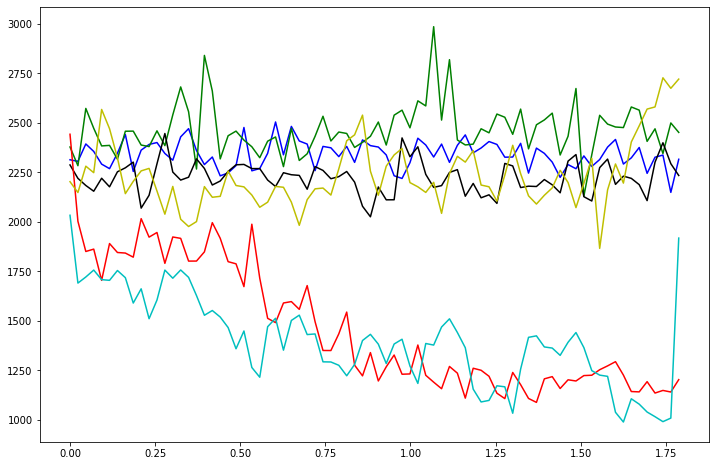

In [13]:
# Spectral Bandwidth as the y-axis
spectral_bandwidth_yes_1 = librosa.feature.spectral_bandwidth(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_yes_2 = librosa.feature.spectral_bandwidth(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_yes_3 = librosa.feature.spectral_bandwidth(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_1 = librosa.feature.spectral_bandwidth(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_2 = librosa.feature.spectral_bandwidth(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_3 = librosa.feature.spectral_bandwidth(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.mean(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.mean(spectral_bandwidth_yes_3)}
'no audio 1':   {np.mean(spectral_bandwidth_no_1)}
'no audio 2':   {np.mean(spectral_bandwidth_no_2)}
'no audio 3':   {np.mean(spectral_bandwidth_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.std(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.std(spectral_bandwidth_yes_3)}
'no audio 1':   {np.std(spectral_bandwidth_no_1)}
'no audio 2':   {np.std(spectral_bandwidth_no_2)}
'no audio 3':   {np.std(spectral_bandwidth_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.var(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.var(spectral_bandwidth_yes_3)}
'no audio 1':   {np.var(spectral_bandwidth_no_1)}
'no audio 2':   {np.var(spectral_bandwidth_no_2)}
'no audio 3':   {np.var(spectral_bandwidth_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_bandwidth_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_bandwidth_yes_1, color='b')
plt.plot(t, spectral_bandwidth_yes_2, color='g')
plt.plot(t, spectral_bandwidth_yes_3, color='k')
plt.plot(t, spectral_bandwidth_no_1, color='r')
plt.plot(t, spectral_bandwidth_no_2, color='y')
plt.plot(t, spectral_bandwidth_no_3, color='c')
plt.show()

### Spectral Flatness

Mean:
'yes audio 2':  0.04798820987343788
'yes audio 1':  0.07967840135097504
'yes audio 3':  0.03884518891572952
'no audio 1':   0.0007840018370188773
'no audio 2':   0.004639083053916693
'no audio 3':   0.0007238636026158929

Standard Deviation:
'yes audio 1':  0.01237047091126442
'yes audio 2':  0.01845160312950611
'yes audio 3':  0.006469433195888996
'no audio 1':   0.0026361781638115644
'no audio 2':   0.0033740601502358913
'no audio 3':   0.0011941933771595359

Variance:
'yes audio 1':  0.0001530285517219454
'yes audio 2':  0.00034046167274937034
'yes audio 3':  4.185356738162227e-05
'no audio 1':   6.949435828573769e-06
'no audio 2':   1.138428251579171e-05
'no audio 3':   1.4260978105085087e-06



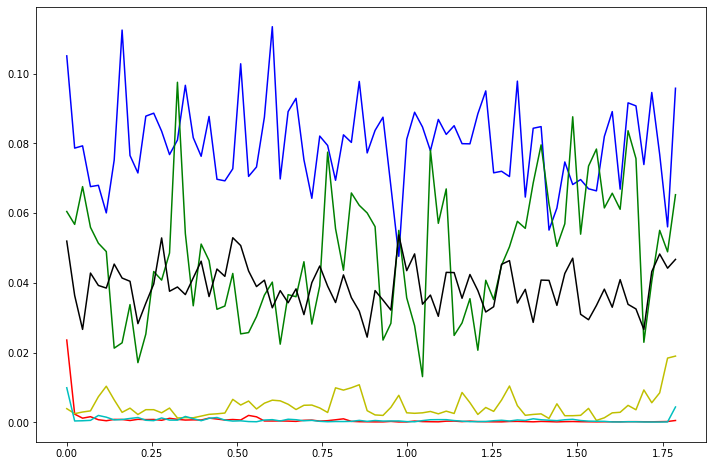

In [14]:
# Spectral Flatness as the y-axis
spectral_flatness_yes_1 = librosa.feature.spectral_flatness(y=sample_yes_audio1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_yes_2 = librosa.feature.spectral_flatness(y=sample_yes_audio2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_yes_3 = librosa.feature.spectral_flatness(y=sample_yes_audio3, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_1 = librosa.feature.spectral_flatness(y=sample_no_audio1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_2 = librosa.feature.spectral_flatness(y=sample_no_audio2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_3 = librosa.feature.spectral_flatness(y=sample_no_audio3, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(spectral_flatness_yes_2)}
'yes audio 1':  {np.mean(spectral_flatness_yes_1)}
'yes audio 3':  {np.mean(spectral_flatness_yes_3)}
'no audio 1':   {np.mean(spectral_flatness_no_1)}
'no audio 2':   {np.mean(spectral_flatness_no_2)}
'no audio 3':   {np.mean(spectral_flatness_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_flatness_yes_1)}
'yes audio 2':  {np.std(spectral_flatness_yes_2)}
'yes audio 3':  {np.std(spectral_flatness_yes_3)}
'no audio 1':   {np.std(spectral_flatness_no_1)}
'no audio 2':   {np.std(spectral_flatness_no_2)}
'no audio 3':   {np.std(spectral_flatness_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_flatness_yes_1)}
'yes audio 2':  {np.var(spectral_flatness_yes_2)}
'yes audio 3':  {np.var(spectral_flatness_yes_3)}
'no audio 1':   {np.var(spectral_flatness_no_1)}
'no audio 2':   {np.var(spectral_flatness_no_2)}
'no audio 3':   {np.var(spectral_flatness_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_flatness_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_flatness_yes_1, color='b')
plt.plot(t, spectral_flatness_yes_2, color='g')
plt.plot(t, spectral_flatness_yes_3, color='k')
plt.plot(t, spectral_flatness_no_1, color='r')
plt.plot(t, spectral_flatness_no_2, color='y')
plt.plot(t, spectral_flatness_no_3, color='c')
plt.show()

### Spectral Contrast

Mean:
'yes audio 2':  12.736475821546046
'yes audio 1':  17.41405247963238
'yes audio 3':  10.381493184650632
'no audio 1':   12.497028735804788
'no audio 2':   10.00948796133493
'no audio 3':   13.18287309599495

Standard Deviation:
'yes audio 1':  5.690231039080309
'yes audio 2':  4.42956795952727
'yes audio 3':  4.5690599898572986
'no audio 1':   3.9631341320248583
'no audio 2':   3.4885087141657496
'no audio 3':   5.164570401874663

Variance:
'yes audio 1':  32.378729278112964
'yes audio 2':  19.621072308070577
'yes audio 3':  20.876309190914775
'no audio 1':   15.706432148420426
'no audio 2':   12.169693048810371
'no audio 3':   26.672787435919815



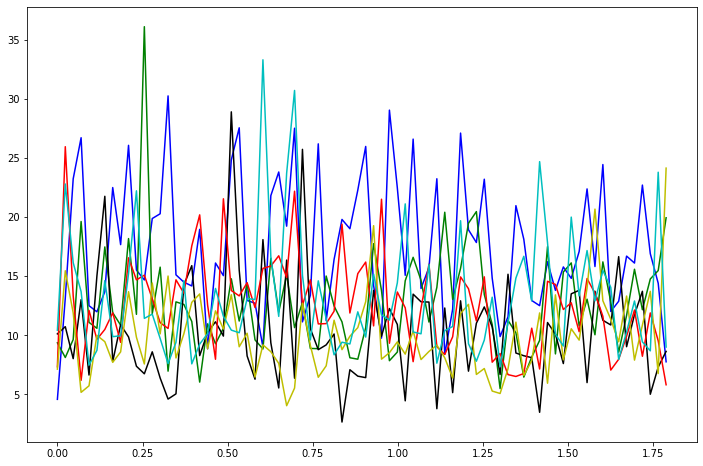

In [15]:
# Spectral Contrast as the y-axis
spectral_contrast_yes_1 = librosa.feature.spectral_contrast(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_yes_2 = librosa.feature.spectral_contrast(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_yes_3 = librosa.feature.spectral_contrast(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_no_1 = librosa.feature.spectral_contrast(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_no_2 = librosa.feature.spectral_contrast(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_no_3 = librosa.feature.spectral_contrast(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(spectral_contrast_yes_2)}
'yes audio 1':  {np.mean(spectral_contrast_yes_1)}
'yes audio 3':  {np.mean(spectral_contrast_yes_3)}
'no audio 1':   {np.mean(spectral_contrast_no_1)}
'no audio 2':   {np.mean(spectral_contrast_no_2)}
'no audio 3':   {np.mean(spectral_contrast_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_contrast_yes_1)}
'yes audio 2':  {np.std(spectral_contrast_yes_2)}
'yes audio 3':  {np.std(spectral_contrast_yes_3)}
'no audio 1':   {np.std(spectral_contrast_no_1)}
'no audio 2':   {np.std(spectral_contrast_no_2)}
'no audio 3':   {np.std(spectral_contrast_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_contrast_yes_1)}
'yes audio 2':  {np.var(spectral_contrast_yes_2)}
'yes audio 3':  {np.var(spectral_contrast_yes_3)}
'no audio 1':   {np.var(spectral_contrast_no_1)}
'no audio 2':   {np.var(spectral_contrast_no_2)}
'no audio 3':   {np.var(spectral_contrast_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_contrast_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_contrast_yes_1, color='b')
plt.plot(t, spectral_contrast_yes_2, color='g')
plt.plot(t, spectral_contrast_yes_3, color='k')
plt.plot(t, spectral_contrast_no_1, color='r')
plt.plot(t, spectral_contrast_no_2, color='y')
plt.plot(t, spectral_contrast_no_3, color='c')
plt.show()

### Spectral Rolloff

Mean:
'yes audio 2':  5403.729717548077
'yes audio 1':  5741.635366586538
'yes audio 3':  4669.3922776442305
'no audio 1':   2154.9767127403848
'no audio 2':   3187.4661959134614
'no audio 3':   2032.403094951923

Standard Deviation:
'yes audio 1':  280.3766962347716
'yes audio 2':  553.7339369632673
'yes audio 3':  335.0681110903975
'no audio 1':   946.9825263197131
'no audio 2':   677.7542790920076
'no audio 3':   560.31150603341

Variance:
'yes audio 1':  78611.09179152538
'yes audio 2':  306621.27294483973
'yes audio 3':  112270.63906968698
'no audio 1':   896775.905154866
'no audio 2':   459350.8628275268
'no audio 3':   313948.983793428



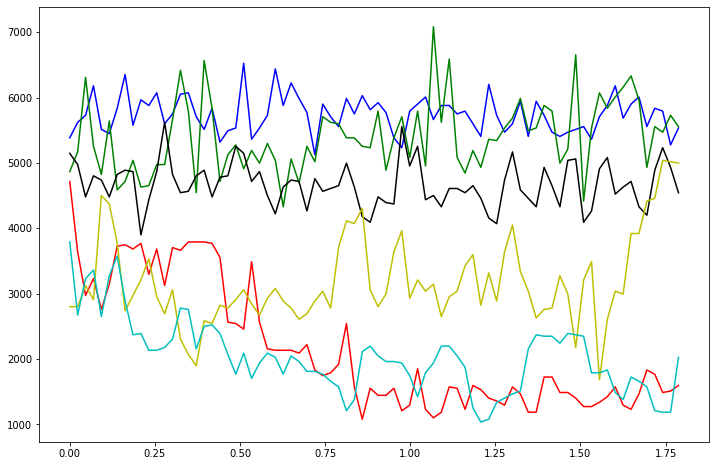

In [16]:
# Spectral Rolloff as the y-axis
spectral_rolloff_yes_1 = librosa.feature.spectral_rolloff(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_yes_2 = librosa.feature.spectral_rolloff(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_yes_3 = librosa.feature.spectral_rolloff(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_no_1 = librosa.feature.spectral_rolloff(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_no_2 = librosa.feature.spectral_rolloff(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_no_3 = librosa.feature.spectral_rolloff(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(spectral_rolloff_yes_2)}
'yes audio 1':  {np.mean(spectral_rolloff_yes_1)}
'yes audio 3':  {np.mean(spectral_rolloff_yes_3)}
'no audio 1':   {np.mean(spectral_rolloff_no_1)}
'no audio 2':   {np.mean(spectral_rolloff_no_2)}
'no audio 3':   {np.mean(spectral_rolloff_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_rolloff_yes_1)}
'yes audio 2':  {np.std(spectral_rolloff_yes_2)}
'yes audio 3':  {np.std(spectral_rolloff_yes_3)}
'no audio 1':   {np.std(spectral_rolloff_no_1)}
'no audio 2':   {np.std(spectral_rolloff_no_2)}
'no audio 3':   {np.std(spectral_rolloff_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_rolloff_yes_1)}
'yes audio 2':  {np.var(spectral_rolloff_yes_2)}
'yes audio 3':  {np.var(spectral_rolloff_yes_3)}
'no audio 1':   {np.var(spectral_rolloff_no_1)}
'no audio 2':   {np.var(spectral_rolloff_no_2)}
'no audio 3':   {np.var(spectral_rolloff_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_rolloff_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_rolloff_yes_1, color='b')
plt.plot(t, spectral_rolloff_yes_2, color='g')
plt.plot(t, spectral_rolloff_yes_3, color='k')
plt.plot(t, spectral_rolloff_no_1, color='r')
plt.plot(t, spectral_rolloff_no_2, color='y')
plt.plot(t, spectral_rolloff_no_3, color='c')
plt.show()

### Chromagram from Short-Time Fourier Transform

Mean:
'yes audio 2':  0.6459946036338806
'yes audio 1':  0.6674783229827881
'yes audio 3':  0.6657797694206238
'no audio 1':   0.29784640669822693
'no audio 2':   0.6488629579544067
'no audio 3':   0.26494741439819336

Standard Deviation:
'yes audio 1':  0.2062997817993164
'yes audio 2':  0.18423211574554443
'yes audio 3':  0.22467634081840515
'no audio 1':   0.1591271460056305
'no audio 2':   0.20748914778232574
'no audio 3':   0.12763653695583344

Variance:
'yes audio 1':  0.04255960136651993
'yes audio 2':  0.03394147381186485
'yes audio 3':  0.0504794605076313
'no audio 1':   0.02532145008444786
'no audio 2':   0.04305174946784973
'no audio 3':   0.01629108563065529



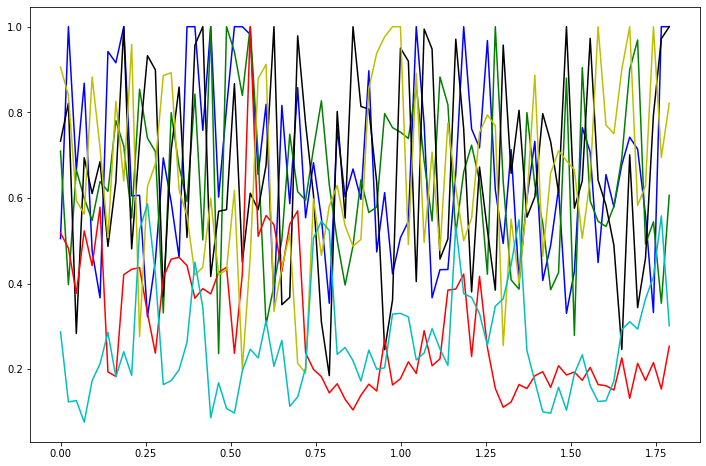

In [17]:
# Chromagram Short-Time Fourier Transform as the y-axis
chroma_stft_yes_1 = librosa.feature.chroma_stft(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_yes_2 = librosa.feature.chroma_stft(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_yes_3 = librosa.feature.chroma_stft(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_no_1 = librosa.feature.chroma_stft(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_no_2 = librosa.feature.chroma_stft(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_no_3 = librosa.feature.chroma_stft(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_stft_yes_2)}
'yes audio 1':  {np.mean(chroma_stft_yes_1)}
'yes audio 3':  {np.mean(chroma_stft_yes_3)}
'no audio 1':   {np.mean(chroma_stft_no_1)}
'no audio 2':   {np.mean(chroma_stft_no_2)}
'no audio 3':   {np.mean(chroma_stft_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_stft_yes_1)}
'yes audio 2':  {np.std(chroma_stft_yes_2)}
'yes audio 3':  {np.std(chroma_stft_yes_3)}
'no audio 1':   {np.std(chroma_stft_no_1)}
'no audio 2':   {np.std(chroma_stft_no_2)}
'no audio 3':   {np.std(chroma_stft_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_stft_yes_1)}
'yes audio 2':  {np.var(chroma_stft_yes_2)}
'yes audio 3':  {np.var(chroma_stft_yes_3)}
'no audio 1':   {np.var(chroma_stft_no_1)}
'no audio 2':   {np.var(chroma_stft_no_2)}
'no audio 3':   {np.var(chroma_stft_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_stft_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_stft_yes_1, color='b')
plt.plot(t, chroma_stft_yes_2, color='g')
plt.plot(t, chroma_stft_yes_3, color='k')
plt.plot(t, chroma_stft_no_1, color='r')
plt.plot(t, chroma_stft_no_2, color='y')
plt.plot(t, chroma_stft_no_3, color='c')
plt.show()

### Chromagram (Constant-Q)

/home/reynardo/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(


Mean:
'yes audio 2':  0.6276857256889343
'yes audio 1':  0.7240193486213684
'yes audio 3':  0.7477056384086609
'no audio 1':   0.21397453546524048
'no audio 2':   0.7239611148834229
'no audio 3':   0.318025141954422

Standard Deviation:
'yes audio 1':  0.14072728157043457
'yes audio 2':  0.1896640658378601
'yes audio 3':  0.136788472533226
'no audio 1':   0.051964499056339264
'no audio 2':   0.18316596746444702
'no audio 3':   0.10860534012317657

Variance:
'yes audio 1':  0.01980416662991047
'yes audio 2':  0.03597245737910271
'yes audio 3':  0.018711086362600327
'no audio 1':   0.0027003090362995863
'no audio 2':   0.03354977071285248
'no audio 3':   0.011795119382441044



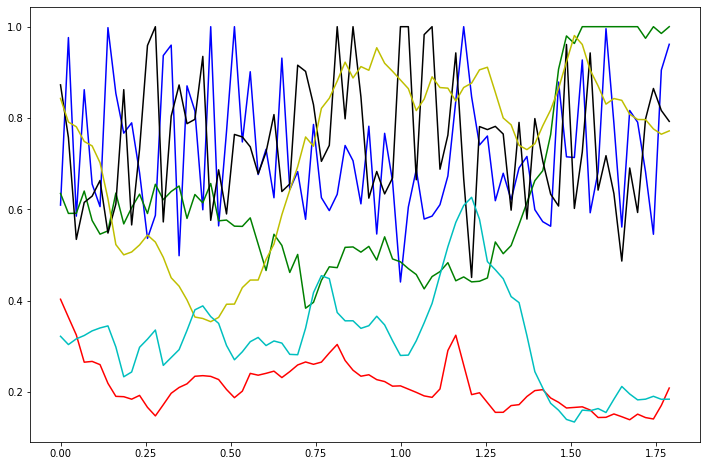

In [18]:
# Chromagram Constant-Q as the y-axis
chroma_cqt_yes_1 = librosa.feature.chroma_cqt(y=sample_yes_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_yes_2 = librosa.feature.chroma_cqt(y=sample_yes_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_yes_3 = librosa.feature.chroma_cqt(y=sample_yes_audio3, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_no_1 = librosa.feature.chroma_cqt(y=sample_no_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_no_2 = librosa.feature.chroma_cqt(y=sample_no_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_no_3 = librosa.feature.chroma_cqt(y=sample_no_audio3, sr=sr, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_cqt_yes_2)}
'yes audio 1':  {np.mean(chroma_cqt_yes_1)}
'yes audio 3':  {np.mean(chroma_cqt_yes_3)}
'no audio 1':   {np.mean(chroma_cqt_no_1)}
'no audio 2':   {np.mean(chroma_cqt_no_2)}
'no audio 3':   {np.mean(chroma_cqt_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_cqt_yes_1)}
'yes audio 2':  {np.std(chroma_cqt_yes_2)}
'yes audio 3':  {np.std(chroma_cqt_yes_3)}
'no audio 1':   {np.std(chroma_cqt_no_1)}
'no audio 2':   {np.std(chroma_cqt_no_2)}
'no audio 3':   {np.std(chroma_cqt_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_cqt_yes_1)}
'yes audio 2':  {np.var(chroma_cqt_yes_2)}
'yes audio 3':  {np.var(chroma_cqt_yes_3)}
'no audio 1':   {np.var(chroma_cqt_no_1)}
'no audio 2':   {np.var(chroma_cqt_no_2)}
'no audio 3':   {np.var(chroma_cqt_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_cqt_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_cqt_yes_1, color='b')
plt.plot(t, chroma_cqt_yes_2, color='g')
plt.plot(t, chroma_cqt_yes_3, color='k')
plt.plot(t, chroma_cqt_no_1, color='r')
plt.plot(t, chroma_cqt_no_2, color='y')
plt.plot(t, chroma_cqt_no_3, color='c')
plt.show()

### Chromagram Variant "Chroma Energy Normalised" (CENS)

Mean:
'yes audio 2':  0.2778451144695282
'yes audio 1':  0.2806032598018646
'yes audio 3':  0.2854037880897522
'no audio 1':   0.21998177468776703
'no audio 2':   0.27892327308654785
'no audio 3':   0.266739159822464

Standard Deviation:
'yes audio 1':  0.014016637578606606
'yes audio 2':  0.06954820454120636
'yes audio 3':  0.011449567973613739
'no audio 1':   0.011698362417519093
'no audio 2':   0.02411350980401039
'no audio 3':   0.04094579815864563

Variance:
'yes audio 1':  0.00019646612054202706
'yes audio 2':  0.004836952779442072
'yes audio 3':  0.00013109260180499405
'no audio 1':   0.00013685168232768774
'no audio 2':   0.0005814613541588187
'no audio 3':   0.0016765585169196129



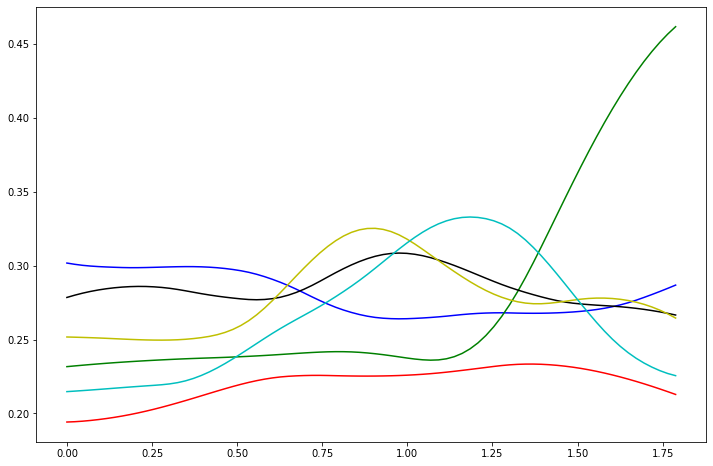

In [19]:
# Chromagram Variant "Chroma Energy Normalised" (CENS) as the y-axis
chroma_cens_yes_1 = librosa.feature.chroma_cens(y=sample_yes_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_yes_2 = librosa.feature.chroma_cens(y=sample_yes_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_yes_3 = librosa.feature.chroma_cens(y=sample_yes_audio3, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_no_1 = librosa.feature.chroma_cens(y=sample_no_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_no_2 = librosa.feature.chroma_cens(y=sample_no_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_no_3 = librosa.feature.chroma_cens(y=sample_no_audio3, sr=sr, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_cens_yes_2)}
'yes audio 1':  {np.mean(chroma_cens_yes_1)}
'yes audio 3':  {np.mean(chroma_cens_yes_3)}
'no audio 1':   {np.mean(chroma_cens_no_1)}
'no audio 2':   {np.mean(chroma_cens_no_2)}
'no audio 3':   {np.mean(chroma_cens_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_cens_yes_1)}
'yes audio 2':  {np.std(chroma_cens_yes_2)}
'yes audio 3':  {np.std(chroma_cens_yes_3)}
'no audio 1':   {np.std(chroma_cens_no_1)}
'no audio 2':   {np.std(chroma_cens_no_2)}
'no audio 3':   {np.std(chroma_cens_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_cens_yes_1)}
'yes audio 2':  {np.var(chroma_cens_yes_2)}
'yes audio 3':  {np.var(chroma_cens_yes_3)}
'no audio 1':   {np.var(chroma_cens_no_1)}
'no audio 2':   {np.var(chroma_cens_no_2)}
'no audio 3':   {np.var(chroma_cens_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_cens_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_cens_yes_1, color='b')
plt.plot(t, chroma_cens_yes_2, color='g')
plt.plot(t, chroma_cens_yes_3, color='k')
plt.plot(t, chroma_cens_no_1, color='r')
plt.plot(t, chroma_cens_no_2, color='y')
plt.plot(t, chroma_cens_no_3, color='c')
plt.show()

### Variable-Q Chromagram

Mean:
'yes audio 2':  0.7360121607780457
'yes audio 1':  0.6473793983459473
'yes audio 3':  0.6920026540756226
'no audio 1':   0.3150431215763092
'no audio 2':   0.742426872253418
'no audio 3':   0.39124107360839844

Standard Deviation:
'yes audio 1':  0.1678979992866516
'yes audio 2':  0.18719318509101868
'yes audio 3':  0.1800643354654312
'no audio 1':   0.15184329450130463
'no audio 2':   0.21269193291664124
'no audio 3':   0.1829736977815628

Variance:
'yes audio 1':  0.02818973921239376
'yes audio 2':  0.035041291266679764
'yes audio 3':  0.03242316469550133
'no audio 1':   0.023056387901306152
'no audio 2':   0.04523785784840584
'no audio 3':   0.03347937390208244



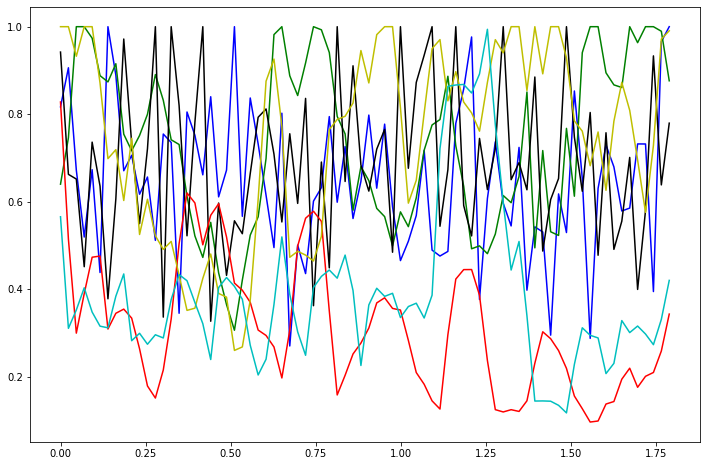

In [20]:
# Variable-Q Chromagram as the y-axis
chroma_vqt_yes_1 = librosa.feature.chroma_vqt(y=sample_yes_audio1, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_yes_2 = librosa.feature.chroma_vqt(y=sample_yes_audio2, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_yes_3 = librosa.feature.chroma_vqt(y=sample_yes_audio3, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_no_1 = librosa.feature.chroma_vqt(y=sample_no_audio1, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_no_2 = librosa.feature.chroma_vqt(y=sample_no_audio2, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_no_3 = librosa.feature.chroma_vqt(y=sample_no_audio3, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_vqt_yes_2)}
'yes audio 1':  {np.mean(chroma_vqt_yes_1)}
'yes audio 3':  {np.mean(chroma_vqt_yes_3)}
'no audio 1':   {np.mean(chroma_vqt_no_1)}
'no audio 2':   {np.mean(chroma_vqt_no_2)}
'no audio 3':   {np.mean(chroma_vqt_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_vqt_yes_1)}
'yes audio 2':  {np.std(chroma_vqt_yes_2)}
'yes audio 3':  {np.std(chroma_vqt_yes_3)}
'no audio 1':   {np.std(chroma_vqt_no_1)}
'no audio 2':   {np.std(chroma_vqt_no_2)}
'no audio 3':   {np.std(chroma_vqt_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_vqt_yes_1)}
'yes audio 2':  {np.var(chroma_vqt_yes_2)}
'yes audio 3':  {np.var(chroma_vqt_yes_3)}
'no audio 1':   {np.var(chroma_vqt_no_1)}
'no audio 2':   {np.var(chroma_vqt_no_2)}
'no audio 3':   {np.var(chroma_vqt_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_vqt_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_vqt_yes_1, color='b')
plt.plot(t, chroma_vqt_yes_2, color='g')
plt.plot(t, chroma_vqt_yes_3, color='k')
plt.plot(t, chroma_vqt_no_1, color='r')
plt.plot(t, chroma_vqt_no_2, color='y')
plt.plot(t, chroma_vqt_no_3, color='c')
plt.show()

### Melspectrogram

Mean:
'yes audio 2':  5.841385841369629
'yes audio 1':  0.0002847684663720429
'yes audio 3':  0.00040997646283358335
'no audio 1':   0.2083946317434311
'no audio 2':   0.04759564995765686
'no audio 3':   0.22572825849056244

Standard Deviation:
'yes audio 1':  0.0003897603019140661
'yes audio 2':  7.745924472808838
'yes audio 3':  0.0003780662373173982
'no audio 1':   0.17956289649009705
'no audio 2':   0.03748689964413643
'no audio 3':   0.15158186852931976

Variance:
'yes audio 1':  1.519130847782435e-07
'yes audio 2':  59.99934768676758
'yes audio 3':  1.4293406991328084e-07
'no audio 1':   0.03224283456802368
'no audio 2':   0.001405267626978457
'no audio 3':   0.022977061569690704



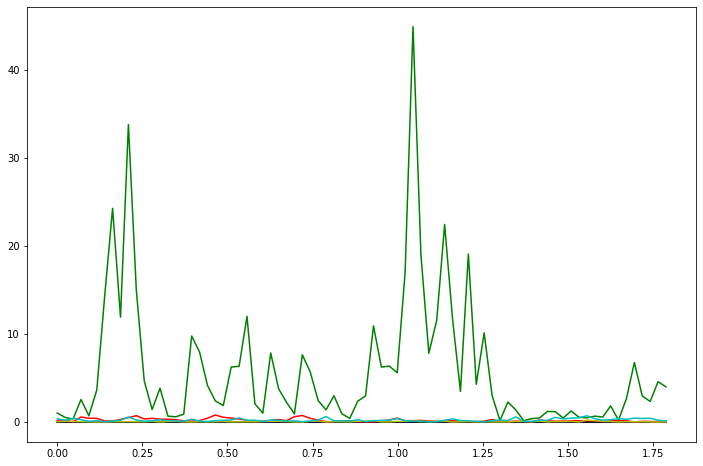

In [21]:
# Melspectrogram as the y-axis
melspectrogram_yes_1 = librosa.feature.melspectrogram(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_yes_2 = librosa.feature.melspectrogram(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_yes_3 = librosa.feature.melspectrogram(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_no_1 = librosa.feature.melspectrogram(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_no_2 = librosa.feature.melspectrogram(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_no_3 = librosa.feature.melspectrogram(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(melspectrogram_yes_2)}
'yes audio 1':  {np.mean(melspectrogram_yes_1)}
'yes audio 3':  {np.mean(melspectrogram_yes_3)}
'no audio 1':   {np.mean(melspectrogram_no_1)}
'no audio 2':   {np.mean(melspectrogram_no_2)}
'no audio 3':   {np.mean(melspectrogram_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(melspectrogram_yes_1)}
'yes audio 2':  {np.std(melspectrogram_yes_2)}
'yes audio 3':  {np.std(melspectrogram_yes_3)}
'no audio 1':   {np.std(melspectrogram_no_1)}
'no audio 2':   {np.std(melspectrogram_no_2)}
'no audio 3':   {np.std(melspectrogram_no_3)}

Variance:
'yes audio 1':  {np.var(melspectrogram_yes_1)}
'yes audio 2':  {np.var(melspectrogram_yes_2)}
'yes audio 3':  {np.var(melspectrogram_yes_3)}
'no audio 1':   {np.var(melspectrogram_no_1)}
'no audio 2':   {np.var(melspectrogram_no_2)}
'no audio 3':   {np.var(melspectrogram_no_3)}
""")

# Time as the x-axis
frames = range(0, melspectrogram_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, melspectrogram_yes_1, color='b')
plt.plot(t, melspectrogram_yes_2, color='g')
plt.plot(t, melspectrogram_yes_3, color='k')
plt.plot(t, melspectrogram_no_1, color='r')
plt.plot(t, melspectrogram_no_2, color='y')
plt.plot(t, melspectrogram_no_3, color='c')
plt.show()

### Mel-Frequency Cepstral Coefficients (MFCCs)

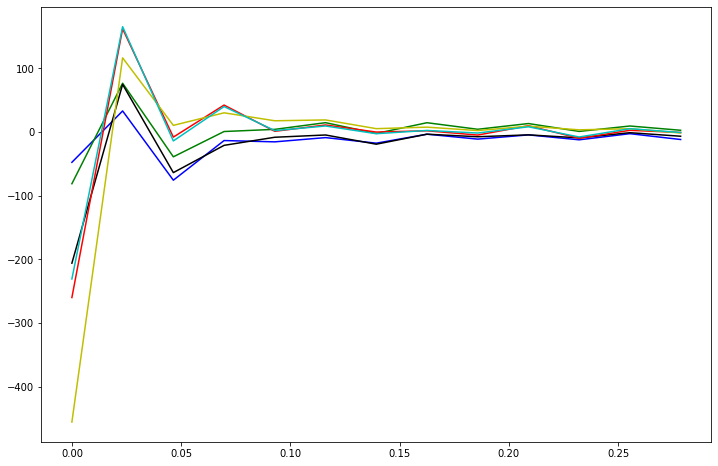

In [22]:
n_mfcc = 13 # usually in the range from 12 to 19

# Mel-Frequency Cepstral Coefficients (MFCCs) as the y-axis
mfccs_yes_1 = librosa.feature.mfcc(y=sample_yes_audio1, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_yes_2 = librosa.feature.mfcc(y=sample_yes_audio2, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_yes_3 = librosa.feature.mfcc(y=sample_yes_audio3, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_no_1 = librosa.feature.mfcc(y=sample_no_audio1, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_no_2 = librosa.feature.mfcc(y=sample_no_audio2, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_no_3 = librosa.feature.mfcc(y=sample_no_audio3, sr=sr, n_mfcc=n_mfcc)# [0]

mfccs = [mfccs_yes_1, mfccs_yes_2, mfccs_yes_3, mfccs_no_1, mfccs_no_2, mfccs_no_3]
new_mfccs = []

for mfcc in mfccs:
    new_mfcc = []
    for row_index in range(n_mfcc):
        new_mfcc.append(np.mean(mfcc[row_index, 1:]))
    new_mfcc = np.array(new_mfcc)
    new_mfccs.append(new_mfcc)
new_mfccs = np.array(new_mfccs)

# Time as the x-axis
frames = range(0, new_mfccs[0].size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, new_mfccs[0], color='b')
plt.plot(t, new_mfccs[1], color='g')
plt.plot(t, new_mfccs[2], color='k')
plt.plot(t, new_mfccs[3], color='r')
plt.plot(t, new_mfccs[4], color='y')
plt.plot(t, new_mfccs[5], color='c')
plt.show()

### Poly Features

Mean:
'yes audio 2':  -0.0002181558029996996
'yes audio 1':  -0.0002804129364314609
'yes audio 3':  -6.512176930263231e-05
'no audio 1':   -0.00011888328989015433
'no audio 2':   -1.0798553182924722e-05
'no audio 3':   -0.00016395037162269806

Standard Deviation:
'yes audio 1':  2.360938344209571e-05
'yes audio 2':  3.114043556006781e-05
'yes audio 3':  5.8917186894739744e-06
'no audio 1':   3.656612869684413e-05
'no audio 2':   4.261058068163771e-06
'no audio 3':   7.952914170060347e-05

Variance:
'yes audio 1':  5.574029865159031e-10
'yes audio 2':  9.697267268707355e-10
'yes audio 3':  3.471234911589692e-11
'no audio 1':   1.3370817678741677e-09
'no audio 2':   1.8156615860263565e-11
'no audio 3':   6.324884379634665e-09



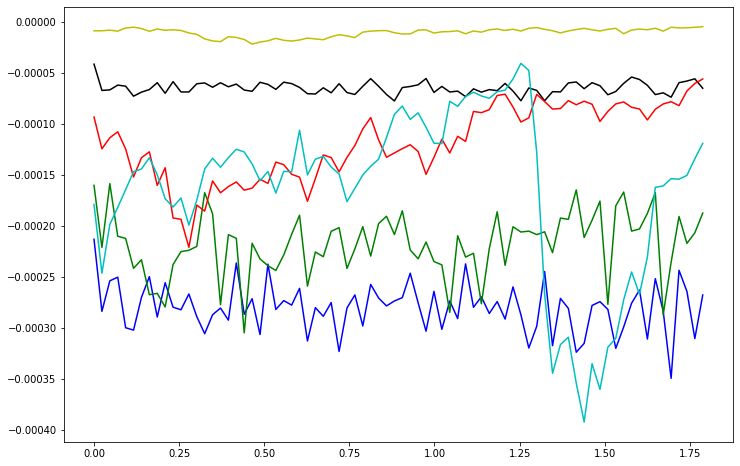

In [23]:
# Poly Features as the y-axis
poly_features_yes_1 = librosa.feature.poly_features(y=sample_yes_audio1, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_yes_2 = librosa.feature.poly_features(y=sample_yes_audio2, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_yes_3 = librosa.feature.poly_features(y=sample_yes_audio3, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_no_1 = librosa.feature.poly_features(y=sample_no_audio1, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_no_2 = librosa.feature.poly_features(y=sample_no_audio2, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_no_3 = librosa.feature.poly_features(y=sample_no_audio3, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(poly_features_yes_2)}
'yes audio 1':  {np.mean(poly_features_yes_1)}
'yes audio 3':  {np.mean(poly_features_yes_3)}
'no audio 1':   {np.mean(poly_features_no_1)}
'no audio 2':   {np.mean(poly_features_no_2)}
'no audio 3':   {np.mean(poly_features_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(poly_features_yes_1)}
'yes audio 2':  {np.std(poly_features_yes_2)}
'yes audio 3':  {np.std(poly_features_yes_3)}
'no audio 1':   {np.std(poly_features_no_1)}
'no audio 2':   {np.std(poly_features_no_2)}
'no audio 3':   {np.std(poly_features_no_3)}

Variance:
'yes audio 1':  {np.var(poly_features_yes_1)}
'yes audio 2':  {np.var(poly_features_yes_2)}
'yes audio 3':  {np.var(poly_features_yes_3)}
'no audio 1':   {np.var(poly_features_no_1)}
'no audio 2':   {np.var(poly_features_no_2)}
'no audio 3':   {np.var(poly_features_no_3)}
""")

# Time as the x-axis
frames = range(0, poly_features_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, poly_features_yes_1, color='b')
plt.plot(t, poly_features_yes_2, color='g')
plt.plot(t, poly_features_yes_3, color='k')
plt.plot(t, poly_features_no_1, color='r')
plt.plot(t, poly_features_no_2, color='y')
plt.plot(t, poly_features_no_3, color='c')
plt.show()

### Tonal Centroid Features (tonnetz)

Mean:
'yes audio 2':  -0.028201662973770514
'yes audio 1':  -0.0007042534277881473
'yes audio 3':  -0.0018261232949588148
'no audio 1':   0.10361757669360085
'no audio 2':   -0.014215280131373619
'no audio 3':   0.08393950058881024

Standard Deviation:
'yes audio 1':  0.03207325541698722
'yes audio 2':  0.02496913975111034
'yes audio 3':  0.03516872451860203
'no audio 1':   0.05305777278999223
'no audio 2':   0.026007893722742224
'no audio 3':   0.07025953516116676

Variance:
'yes audio 1':  0.0010286937130432998
'yes audio 2':  0.0006234579399104784
'yes audio 3':  0.0012368391842653196
'no audio 1':   0.0028151272534344394
'no audio 2':   0.0006764105358934544
'no audio 3':   0.004936402281063228



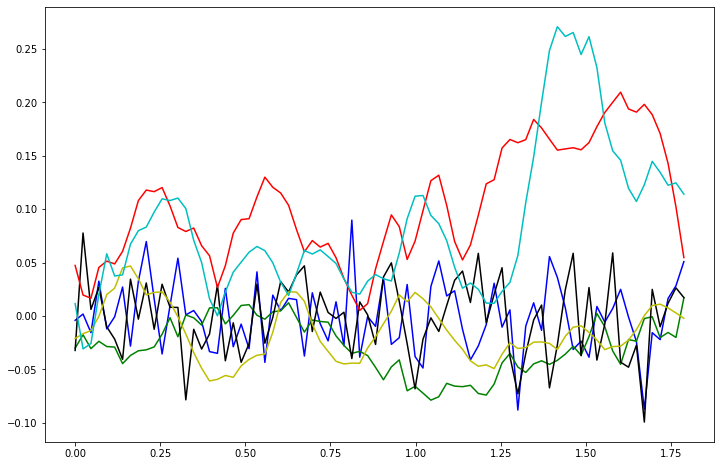

In [24]:
# Tonal Centroid Features as the y-axis
tonnetz_yes_1 = librosa.feature.tonnetz(y=sample_yes_audio1, sr=sr)[0]
tonnetz_yes_2 = librosa.feature.tonnetz(y=sample_yes_audio2, sr=sr)[0]
tonnetz_yes_3 = librosa.feature.tonnetz(y=sample_yes_audio3, sr=sr)[0]
tonnetz_no_1 = librosa.feature.tonnetz(y=sample_no_audio1, sr=sr)[0]
tonnetz_no_2 = librosa.feature.tonnetz(y=sample_no_audio2, sr=sr)[0]
tonnetz_no_3 = librosa.feature.tonnetz(y=sample_no_audio3, sr=sr)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(tonnetz_yes_2)}
'yes audio 1':  {np.mean(tonnetz_yes_1)}
'yes audio 3':  {np.mean(tonnetz_yes_3)}
'no audio 1':   {np.mean(tonnetz_no_1)}
'no audio 2':   {np.mean(tonnetz_no_2)}
'no audio 3':   {np.mean(tonnetz_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(tonnetz_yes_1)}
'yes audio 2':  {np.std(tonnetz_yes_2)}
'yes audio 3':  {np.std(tonnetz_yes_3)}
'no audio 1':   {np.std(tonnetz_no_1)}
'no audio 2':   {np.std(tonnetz_no_2)}
'no audio 3':   {np.std(tonnetz_no_3)}

Variance:
'yes audio 1':  {np.var(tonnetz_yes_1)}
'yes audio 2':  {np.var(tonnetz_yes_2)}
'yes audio 3':  {np.var(tonnetz_yes_3)}
'no audio 1':   {np.var(tonnetz_no_1)}
'no audio 2':   {np.var(tonnetz_no_2)}
'no audio 3':   {np.var(tonnetz_no_3)}
""")

# Time as the x-axis
frames = range(0, tonnetz_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, tonnetz_yes_1, color='b')
plt.plot(t, tonnetz_yes_2, color='g')
plt.plot(t, tonnetz_yes_3, color='k')
plt.plot(t, tonnetz_no_1, color='r')
plt.plot(t, tonnetz_no_2, color='y')
plt.plot(t, tonnetz_no_3, color='c')
plt.show()